## 1. Data Decription

### 1.1. Introduction

In This Exploratory Data Analysis is to practice Python skills learned till now on a structured data set including loading, inspecting, wrangling, exploring, and drawing conclusions from the Netflix dataset.The notebook has observations with each step in order to explain thoroughly how to approach the data set. Based on the observation some questions also are answered in the notebook for the reference though not all of them are explored in the analysis.

### 1.2 Data source and data set

This Netflix Dataset has information about the TV shows and Movies available on Netflix from 2018 to 2021. This dataset collected from kaggle website for free.

Dataset link: https://github.com/Swatikhedekar/EDA-on-NETFLIX-dataset

## 2. Load the Packages and Data


- Import libraries or modules

In [2]:
%%time
import numpy as np                 # for numerical computing
import pandas as pd                # for dataframe and manipulation
import seaborn as sns              #for graphs and data visualization
from matplotlib import pyplot as plt
import pandas_profiling as prf
sns.set()
%matplotlib inline

CPU times: user 1.86 s, sys: 311 ms, total: 2.18 s
Wall time: 5.45 s


- Load the dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
path = '/content/drive/MyDrive/dataset/netflix_titles_2021.csv'
netflix = pd.read_csv(path)


## 3.Data Profiling (Data Exploration)

### 3.1 Understanding the Dataset(Basic information about dataset)

In [5]:
netflix.head() # for shows top 5 rows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
netflix.tail() # For bottom 5 rows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [7]:
netflix.shape     # to show the total no. of columns and rows

(8807, 12)

- This dataset contains 8807 rows and 12 columns.

In [8]:
netflix.size  #This dataset contains 8807 rows and 12 columns.

105684

In [9]:
netflix.columns # to show the columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [10]:
netflix.dtypes      # to shows data types each column name

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [11]:
netflix.info()      # to shows indexes,data types each column name

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [12]:
netflix.describe()    # for shows statistical information

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [13]:
netflix.describe(include='all') 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [14]:
netflix.nunique()   # Finding how many unique values are in the dataset

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

### 3.2 Pre-Profiling

In [107]:
pip install pandas_profiling    


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


- Now performing pandas profiling to understand data better.

In [108]:
netflix_profile = prf.ProfileReport(netflix)
netflix_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [109]:
# save file 
netflix_profile.to_file(output_file="netflix21_before_preprocessing.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### 3.3 Preprocessing

- Dealing with duplicate rows
- Find number of duplicate rows in the dataset.
- Print the duplicate entries and analyze.
- Drop the duplicate entries from the dataset

In [110]:
netflix[netflix.duplicated()]   # to shows the dupbicate rows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [111]:
netflix.duplicated().sum()       # to shows the count of dupbicate rows


0

- No duplicate rows are present in this dataset.


## 4. EDA Questions


### 4.1. What different types of show or movie are uploaded on Netflix? or
 How many TV shows & Movies are in the dataset? Show with Bar Gragh?

In [33]:
netflix_copy.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",missing,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [34]:
# method-1:
netflix_copy.groupby('type')['title'].count().sort_values(ascending = False)

type
Movie      5522
TV Show     178
Name: title, dtype: int64

In [35]:
# method-2:
netflix_copy.type.value_counts().to_frame('Value_count')

,Value_count
Movie,5522
TV Show,178


In [36]:
# to show the count of all uniqu item of a any column in the form og bargragp

sns.countplot(netflix_copy['type'])  

KeyError: ignored

- Obeservation: There are 5522-types of movies and 178-types of tv shows are uploaded on Netflix.

### 4.2 What is the Correlation between the features?



In [37]:
netflix_copy.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [38]:
# Converting object into datetime formate of "date_added"
netflix_copy["date_added"]=pd.to_datetime(netflix_copy['date_added'])
netflix_copy.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",missing,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [39]:
netflix_copy['year_added'] = netflix_copy["date_added"].dt.year
netflix_copy['month_added'] = netflix_copy["date_added"].dt.month
netflix_copy.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",missing,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021,9


In [40]:
netflix_copy.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
year_added               int64
month_added              int64
dtype: object

In [41]:
netflix_copy.corr()



,release_year,year_added,month_added
release_year,1.000000,0.032265,-0.062903
year_added,0.032265,1.000000,-0.170078
month_added,-0.062903,-0.170078,1.000000


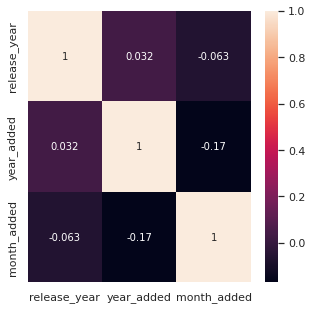

In [42]:
plt.subplots(figsize=(5,5))
sns.heatmap(netflix_copy.corr(),annot=True)
plt.show()

- Obeservation : Above Heatmap shows correlation between release_year,year_added & month_added.

### 4.3 Most watched shows on the Netflix?

In [43]:
netflix_copy.type.value_counts().to_frame('Value_count')

,Value_count
Movie,5522
TV Show,178


(array([0, 1]), [Text(0, 0, 'TV Show'), Text(1, 0, 'Movie')])

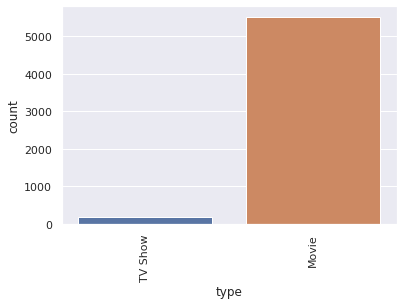

In [44]:
sns.countplot(x=netflix_copy['type'],orient='v')
plt.xticks(rotation=90)

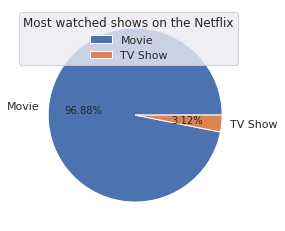

In [45]:
# by using Pie chart
type_show = ['Movie','TV Show']
Value_count = [5522,178]
plt.pie(Value_count,labels=type_show,autopct="%2.2f%%")
plt.legend(title='Most watched shows on the Netflix')
plt.show()

- Obeservation: Audience likes to watched mostly movies(96.88% ) over TV shows(3.12%).

### 4.4 Distribution of Ratings? & What are the different rating defined by Netflix?

In [46]:
netflix_copy.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",missing,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021,9


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'TV-MA'),
  Text(1, 0, 'PG'),
  Text(2, 0, 'TV-14'),
  Text(3, 0, 'PG-13'),
  Text(4, 0, 'TV-PG'),
  Text(5, 0, 'TV-Y'),
  Text(6, 0, 'R'),
  Text(7, 0, 'TV-G'),
  Text(8, 0, 'TV-Y7'),
  Text(9, 0, 'G'),
  Text(10, 0, 'NC-17'),
  Text(11, 0, '74 min'),
  Text(12, 0, '84 min'),
  Text(13, 0, '66 min'),
  Text(14, 0, 'NR'),
  Text(15, 0, 'TV-Y7-FV'),
  Text(16, 0, 'UR'),
  Text(17, 0, 'missing')])

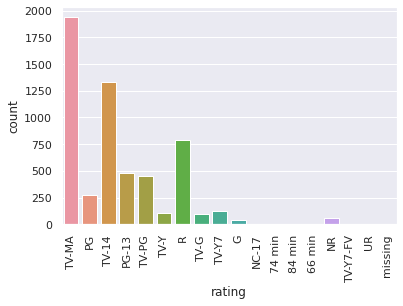

In [47]:
#countplot for distrubution

sns.countplot(x=netflix_copy['rating'],orient='v')
plt.xticks(rotation=90)

In [48]:
netflix['rating'].nunique()

17

Obeservation :

- Audience prefers mostly TV-MA & TV-14 and less prefers NC-17 as rating.
- There are 17 types of ratings in the netflix.

### 4.5 Which has the highest rating Tv show or Movies?

In [50]:
netflix_copy.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",missing,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021,9


In [51]:
netflix.groupby("type")["rating"].agg(pd.Series.mode)

type
Movie      TV-MA
TV Show    TV-MA
Name: rating, dtype: object

- Adding new feature
new_genre (Genre 1,Genre 2,Genre 3)

In [53]:
new_genre = netflix_copy['listed_in'].str.split(",",2)
new_genre

2       [Crime TV Shows,  International TV Shows,  TV ...
5                  [TV Dramas,  TV Horror,  TV Mysteries]
6                              [Children & Family Movies]
7       [Dramas,  Independent Movies,  International M...
8                         [British TV Shows,  Reality TV]
                              ...                        
8801          [Dramas,  International Movies,  Thrillers]
8802                   [Cult Movies,  Dramas,  Thrillers]
8804                           [Comedies,  Horror Movies]
8805                [Children & Family Movies,  Comedies]
8806    [Dramas,  International Movies,  Music & Music...
Name: listed_in, Length: 5700, dtype: object

In [54]:
netflix_copy['Genre 1'] = new_genre.str.get(0)
netflix_copy['Genre 2'] = new_genre.str.get(1)
netflix_copy['Genre 3'] = new_genre.str.get(2)
netflix_copy.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,Genre 1,Genre 2,Genre 3
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,Crime TV Shows,International TV Shows,TV Action & Adventure
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",missing,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021,9,TV Dramas,TV Horror,TV Mysteries


In [55]:
netflix_copy['Genre 1'].describe(include=all)

count       5700
unique        33
top       Dramas
freq        1586
Name: Genre 1, dtype: object

In [56]:
netflix_copy['Genre 2'].describe(include=all)

count                      4485
unique                       35
top        International Movies
freq                       1545
Name: Genre 2, dtype: object

In [57]:
netflix_copy['Genre 3'].describe(include=all)

count                      2434
unique                       29
top        International Movies
freq                        881
Name: Genre 3, dtype: object

- drop listed_in column because not need

In [58]:
netflix_copy.drop('listed_in',axis = 1,inplace = True)
netflix_copy.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,description,year_added,month_added,Genre 1,Genre 2,Genre 3
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,2021-09-24,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,2021,9,Crime TV Shows,International TV Shows,TV Action & Adventure
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",missing,2021-09-24,2021,TV-MA,1 Season,The arrival of a charismatic young priest brin...,2021,9,TV Dramas,TV Horror,TV Mysteries


In [59]:
netflix_copy.duplicated().sum()

0

In [60]:
netflix_copy.groupby(['Genre 2'])['release_year'].count().sort_values(ascending = False)

Genre 2
 International Movies            1545
 Dramas                           744
 Independent Movies               572
 Comedies                         440
 Thrillers                        232
 Romantic Movies                  170
 Music & Musicals                 119
 Sci-Fi & Fantasy                 109
 Horror Movies                     71
 Sports Movies                     68
 Anime Features                    49
 Faith & Spirituality              49
 Cult Movies                       44
 International TV Shows            41
 Children & Family Movies          31
 Classic Movies                    30
 LGBTQ Movies                      30
 TV Dramas                         23
 Romantic TV Shows                 22
 Documentaries                     21
 TV Comedies                       20
 Korean TV Shows                    9
 Stand-Up Comedy                    9
 Crime TV Shows                     8
 Docuseries                         7
 TV Action & Adventure              7
 TV 

In [61]:
netflix_copy.groupby(['Genre 3'])['release_year'].count().sort_values(ascending = False)

Genre 3
 International Movies            881
 Romantic Movies                 431
 Thrillers                       278
 Music & Musicals                191
 Independent Movies              159
 Sci-Fi & Fantasy                115
 Sports Movies                    95
 Dramas                           68
 LGBTQ Movies                     52
 TV Dramas                        36
 TV Comedies                      16
 Cult Movies                      14
 Comedies                         12
 Faith & Spirituality             11
 Spanish-Language TV Shows        10
 TV Mysteries                     10
 TV Action & Adventure             7
 International TV Shows            7
 Horror Movies                     7
 Classic Movies                    6
 Romantic TV Shows                 5
 TV Horror                         5
 Children & Family Movies          4
 Stand-Up Comedy & Talk Shows      3
 TV Sci-Fi & Fantasy               3
 TV Thrillers                      3
 Teen TV Shows                

### 4.6 Finding the best Month for releasing content?

In [62]:
netflix_copy.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,description,year_added,month_added,Genre 1,Genre 2,Genre 3
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,2021-09-24,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,2021,9,Crime TV Shows,International TV Shows,TV Action & Adventure
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",missing,2021-09-24,2021,TV-MA,1 Season,The arrival of a charismatic young priest brin...,2021,9,TV Dramas,TV Horror,TV Mysteries


In [63]:
# converting month number to month name
netflix_copy['month_final'] = netflix_copy['month_added'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
netflix_copy.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,description,year_added,month_added,Genre 1,Genre 2,Genre 3,month_final
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,2021-09-24,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,2021,9,Crime TV Shows,International TV Shows,TV Action & Adventure,Sep
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",missing,2021-09-24,2021,TV-MA,1 Season,The arrival of a charismatic young priest brin...,2021,9,TV Dramas,TV Horror,TV Mysteries,Sep


In [65]:
netflix_copy.month_final.value_counts().to_frame('Value_count')

,Value_count
July,535
Dec,511
Oct,507
Jan,503
Apr,501
Mar,497
Aug,492
Sep,475
Nov,468
June,457


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Sep'),
  Text(1, 0, 'Aug'),
  Text(2, 0, 'July'),
  Text(3, 0, 'June'),
  Text(4, 0, 'May'),
  Text(5, 0, 'Apr'),
  Text(6, 0, 'Mar'),
  Text(7, 0, 'Feb'),
  Text(8, 0, 'Jan'),
  Text(9, 0, 'Dec'),
  Text(10, 0, 'Nov'),
  Text(11, 0, 'Oct')])

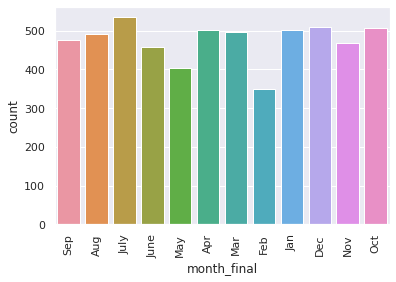

In [66]:
sns.countplot(x=netflix_copy['month_final'],orient='v')
plt.xticks(rotation=90)

- Obeservation: Its clearly shows that july month has maximum number of movies released.july is the best Month for releasing content.

### 4.7 Highest watched genres on Netflix?

In [68]:
netflix_copy.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,description,year_added,month_added,Genre 1,Genre 2,Genre 3,month_final
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,2021-09-24,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,2021,9,Crime TV Shows,International TV Shows,TV Action & Adventure,Sep
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",missing,2021-09-24,2021,TV-MA,1 Season,The arrival of a charismatic young priest brin...,2021,9,TV Dramas,TV Horror,TV Mysteries,Sep


In [69]:
netflix_copy['Genre 1'].describe(include=all)

count       5700
unique        33
top       Dramas
freq        1586
Name: Genre 1, dtype: object

In [70]:
netflix_copy['Genre 2'].describe(include=all)

count                      4485
unique                       35
top        International Movies
freq                       1545
Name: Genre 2, dtype: object

In [71]:
netflix_copy['Genre 3'].describe(include=all)

count                      2434
unique                       29
top        International Movies
freq                        881
Name: Genre 3, dtype: object

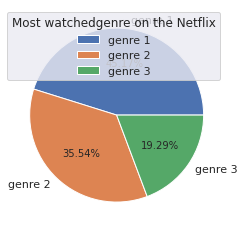

In [72]:
# by using Pie chart
genre_types = ['genre 1','genre 2','genre 3']

Value_count = [5700,4485,2434]
plt.pie(Value_count, labels = genre_types, autopct="%2.2f%%")
plt.legend(title='Most watchedgenre on the Netflix')
plt.show()

- Obeservation: Above Pi-chart Shows that Genre1 has watched maximum times.

### 4.8 Released movie over the years?

In [ ]:
netflix_copy.head(2)

In [73]:
# no. of movies released by every year
netflix_copy.groupby(['release_year'])['release_year'].count().sort_values(ascending = False)

release_year
2018    691
2017    684
2016    584
2019    570
2020    499
       ... 
1944      1
1947      1
1946      1
1945      1
1942      1
Name: release_year, Length: 72, dtype: int64

In [74]:
netflix_copy.release_year.value_counts().to_frame('Value_count')

,Value_count
2018,691
2017,684
2016,584
2019,570
2020,499
...,...
1946,1
1959,1
1942,1
1947,1


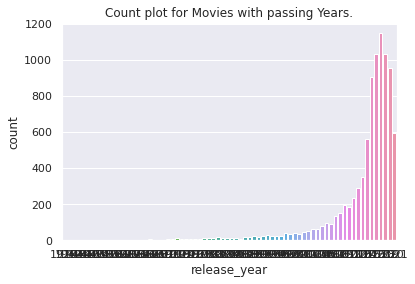

In [75]:
sns.countplot(x='release_year', data=netflix).set_title('Count plot for Movies with passing Years.')
sns.set(rc={'figure.figsize':(60,20)})
plt.show()

Insights:
- From the above we can see that with passing years more movies are being made year by year

- The above data shows that there is a sudden increase in the creation of movies in year 2016 as compared to year 2015

### 4.9 movies made on year basis? or In which year highest number of the TV shows & Movies were released? show with Bar Graph.

In [76]:
netflix_copy.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,description,year_added,month_added,Genre 1,Genre 2,Genre 3,month_final
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,2021-09-24,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,2021,9,Crime TV Shows,International TV Shows,TV Action & Adventure,Sep
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",missing,2021-09-24,2021,TV-MA,1 Season,The arrival of a charismatic young priest brin...,2021,9,TV Dramas,TV Horror,TV Mysteries,Sep


In [78]:
netflix_copy.year_added.value_counts().to_frame('Value_count')


,Value_count
2019,1323
2020,1248
2018,1125
2021,962
2017,744
2016,206
2015,51
2014,14
2011,13
2013,7


In [79]:
netflix_copy.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
description             object
year_added               int64
month_added              int64
Genre 1                 object
Genre 2                 object
Genre 3                 object
month_final             object
dtype: object

In [80]:
netflix_copy["date_added"].dt.year.value_counts()

2019    1323
2020    1248
2018    1125
2021     962
2017     744
2016     206
2015      51
2014      14
2011      13
2013       7
2012       3
2009       2
2008       1
2010       1
Name: date_added, dtype: int64

<Axes: >

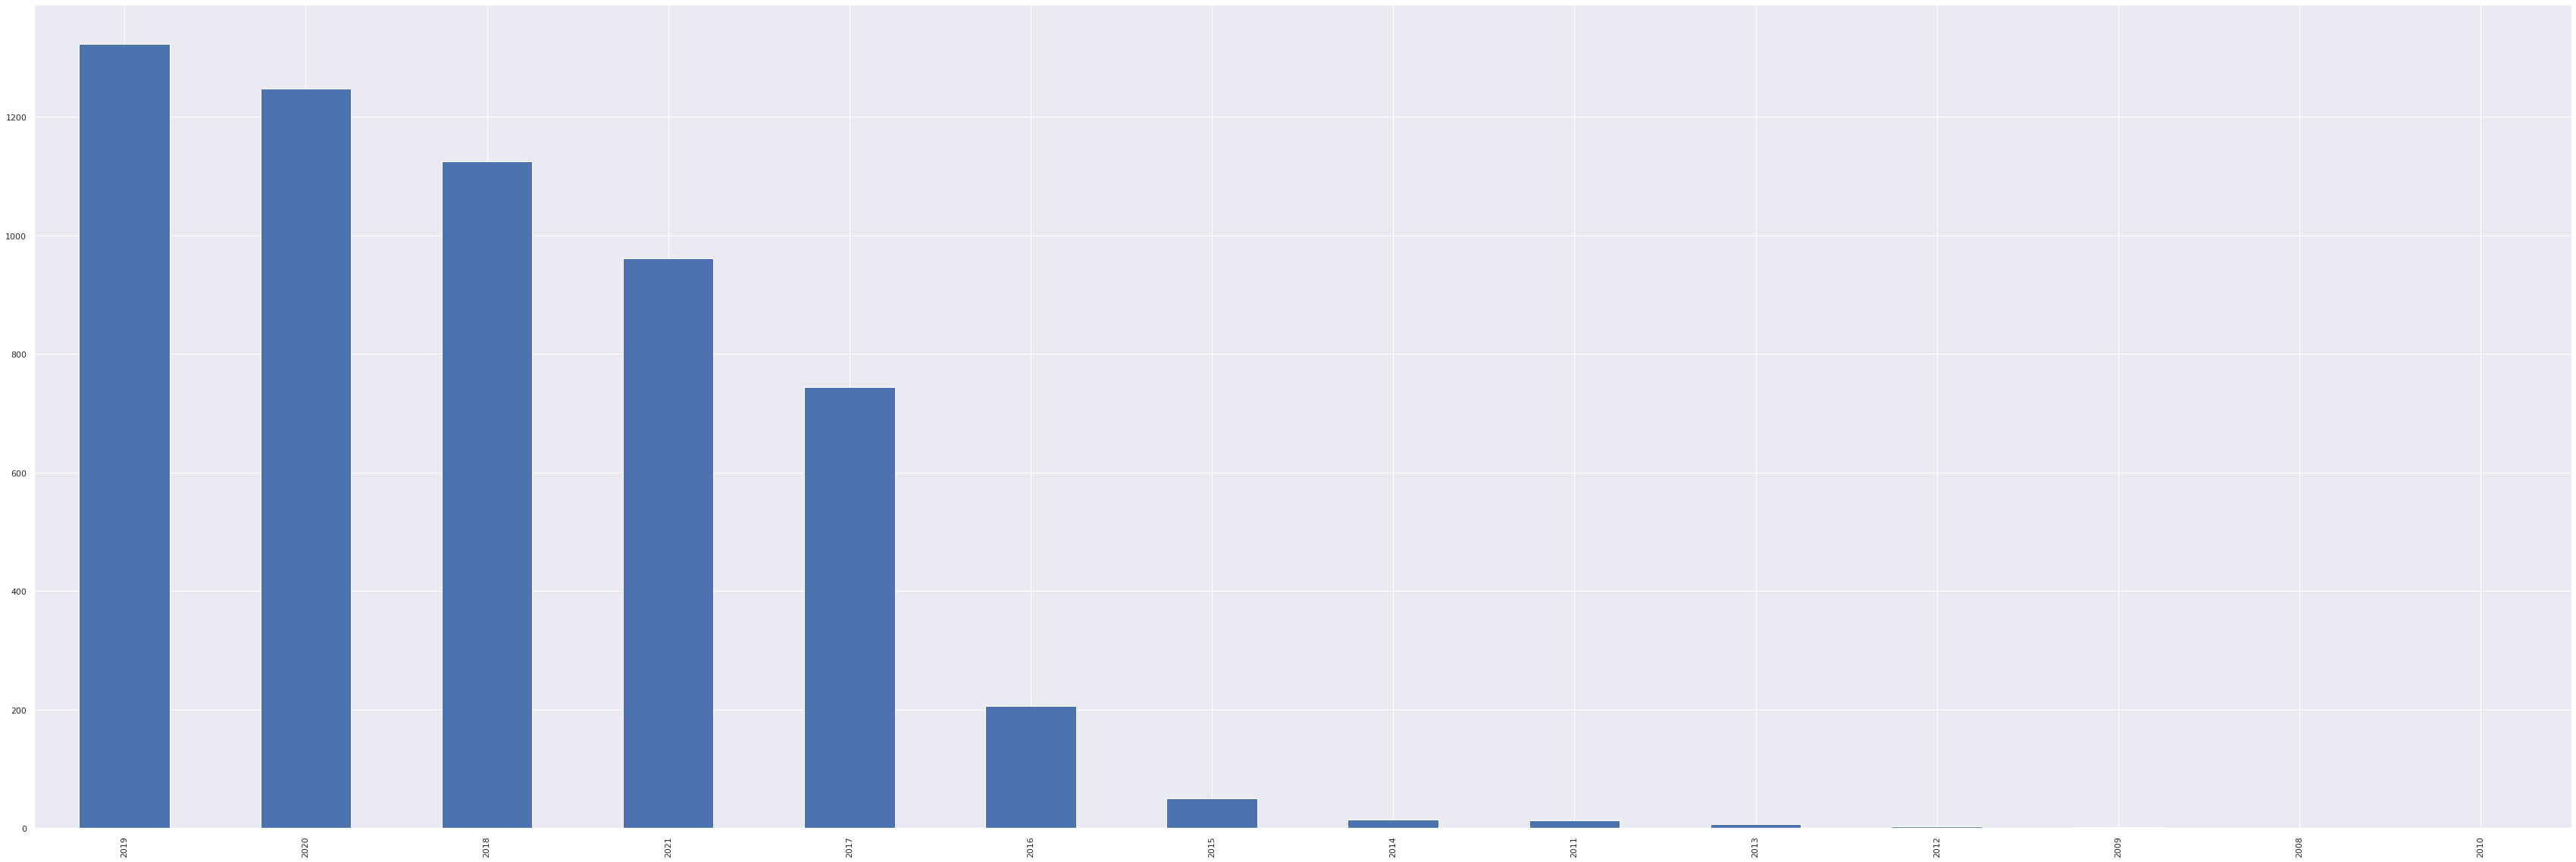

In [81]:
netflix_copy["date_added"].dt.year.value_counts().plot(kind='bar')

- Obeservation: Its clearly shows that maximum movie made on yr 2019

### 4.10 What is the show id and director for 'House of cards'?

In [82]:
netflix.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [83]:
# method 1:
netflix[netflix['title'].isin(["House of Cards"])]  # to shows all records of a particular item in any column

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1059,s1060,TV Show,House of Cards,NaN,"Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"April 14, 2021",2018,TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


In [84]:
# method 2:

netflix[netflix['title'].str.contains("House of Cards")] 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1059,s1060,TV Show,House of Cards,NaN,"Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"April 14, 2021",2018,TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


- Obeservation: For "House of cards" the show id is s1059 and No director.

### 4.11 Show all the movies that were released in year 2000.

In [85]:
netflix.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [86]:
netflix[(netflix['type'] == 'Movie' ) & (netflix['release_year'] == 2000)]
netflix.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [87]:
netflix[(netflix['type'] == 'Movie' ) & (netflix['release_year'] == 2000)].shape


(33, 12)

- Insights: There are 33 movies released in year 2000

### 4.12 Show only the title of all TV shows that were released in India only.

In [88]:
netflix.head(2)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [89]:
netflix[(netflix['type'] == 'TV Show') & (netflix['country'] == 'India')]["title"]


4                             Kota Factory
39                            Chhota Bheem
50                           Dharmakshetra
66           Raja Rasoi Aur Anya Kahaniyan
69          Stories by Rabindranath Tagore
                       ...                
8173                             Thackeray
8235                           The Calling
8321    The Golden Years with Javed Akhtar
8349                The House That Made Me
8775                       Yeh Meri Family
Name: title, Length: 79, dtype: object

In [90]:
netflix[(netflix['type'] == 'TV Show') & (netflix['country'] == 'India')]["title"].shape


(79,)

- Obeservation:There are 79 tv shows that were released in India only.

### 4.13 Show top 10 director, who gave the highest number of TV shows & Movies to Netflix?¶


In [91]:
netflix.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [92]:
netflix["director"].value_counts().head(10)

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: director, dtype: int64

<Axes: >

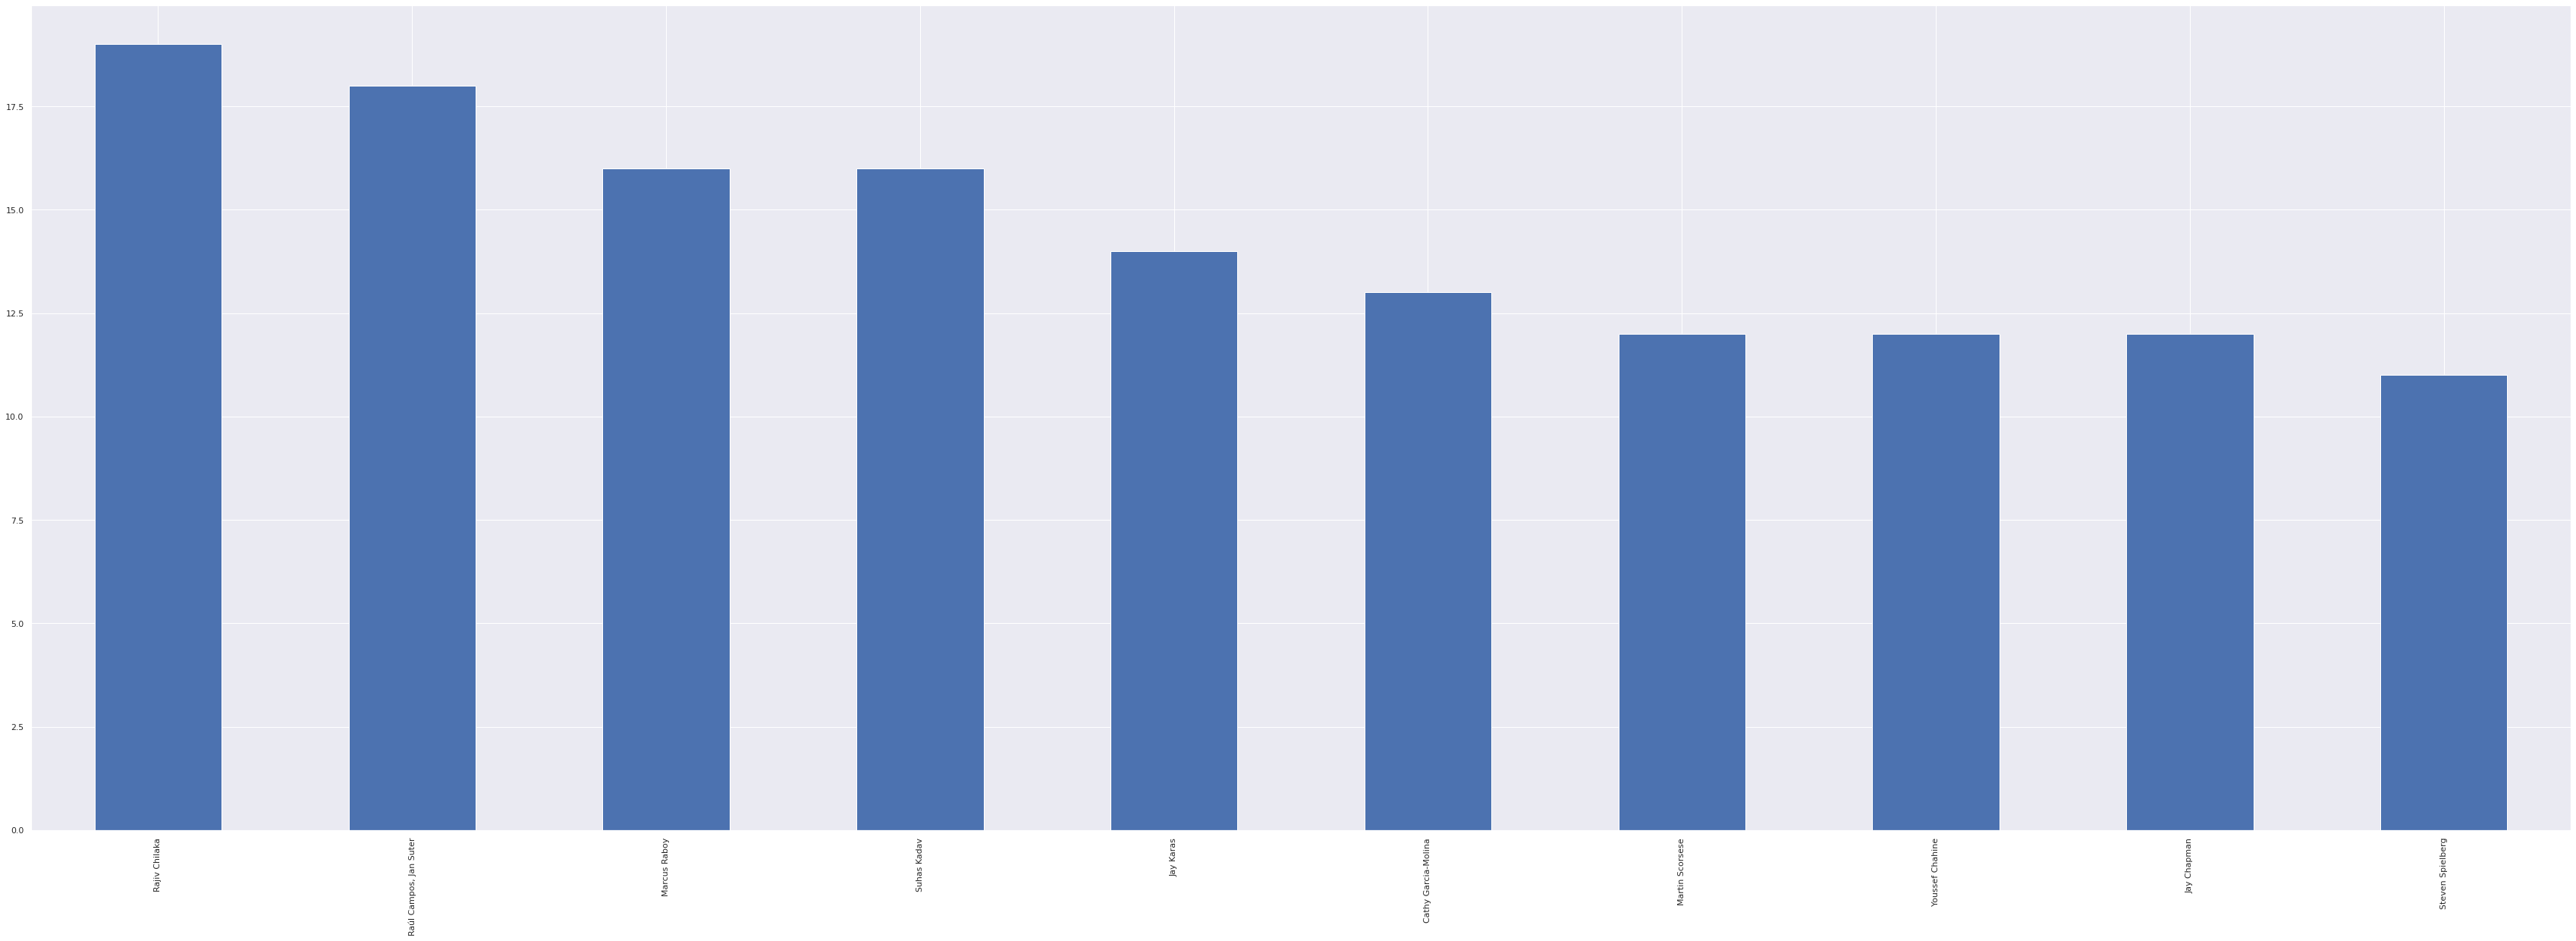

In [93]:
# shown in bar graph 
netflix["director"].value_counts().head(10).plot(kind='bar')

- Observation : TOp 10 director list is shown .Rajiv Chilaka he released maximum no. of Tv shows in india



### 4.14 In how many movies/ tv shows, 'tom Cruise' was cast?

In [94]:
netflix.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [95]:
#method1:
netflix[netflix['cast'] == 'Tom Cruise']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [97]:
#method2:
netflix[netflix['cast'].str.contains('Tom Cruise')]

ValueError: ignored

- Nan values are present ,first FIll null values
create new dataframe

In [98]:
netflix_copy = netflix.dropna()
netflix_copy.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...


In [99]:
netflix_copy[netflix_copy['cast'].str.contains('Tom Cruise')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
341,s342,Movie,Magnolia,Paul Thomas Anderson,"John C. Reilly, Philip Baker Hall, Tom Cruise,...",United States,"August 1, 2021",1999,R,189 min,"Dramas, Independent Movies","Through chance, history and divine interventio..."
1254,s1255,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,"March 1, 2021",1988,R,134 min,"Classic Movies, Dramas","Motivated by money, a selfish workaholic seeki..."


- Obeservation: There are two movies casted Mr.Tom Cruise -"Magnolia" & "Rain Man" .

### 4.15 How many movies got the "TV-14" rating in the caneda?¶


In [100]:
netflix.head(2)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [101]:
netflix[(netflix['type'] == 'Movie') & (netflix['rating'] == 'TV-14')].shape

(1427, 12)

In [102]:
netflix[(netflix['type'] == 'Movie') & (netflix['rating'] == 'TV-14') & (netflix['country'] == 'Canada')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
157,s158,Movie,Level 16,Danishka Esterhazy,"Katie Douglas, Celina Martin, Peter Outerbridg...",Canada,"September 1, 2021",2018,TV-14,102 min,"Sci-Fi & Fantasy, Thrillers",In a bleak academy that teaches girls the virt...
1279,s1280,Movie,Made You Look: A True Story About Fake Art,Barry Avrich,NaN,Canada,"February 23, 2021",2020,TV-14,90 min,"Documentaries, International Movies",A woman walks into a New York gallery with a c...
2769,s2770,Movie,There's Something in the Water,"Ellen Page, Ian Daniel",Ellen Page,Canada,"March 27, 2020",2019,TV-14,72 min,"Documentaries, International Movies",This documentary spotlights the struggle of mi...
3424,s3425,Movie,"Martin Matte: La vie, la mort...eh la la..!",Jean-François Blais,Martin Matte,Canada,"October 14, 2019",2019,TV-14,62 min,Stand-Up Comedy,Quebecois comedy star Martin Matte serves up e...
5972,s5973,Movie,#cats_the_mewvie,Michael Margolis,NaN,Canada,"February 5, 2020",2020,TV-14,90 min,"Documentaries, International Movies",This pawesome documentary explores how our fel...
5973,s5974,Movie,#Roxy,Michael Kennedy,"Jake Short, Sarah Fisher, Booboo Stewart, Dann...",Canada,"April 10, 2019",2018,TV-14,105 min,"Comedies, Romantic Movies",A teenage hacker with a huge nose helps a cool...
6192,s6193,Movie,At First Light,Jason Stone,"Stefanie Scott, Theodore Pellerin, Percy Hynes...",Canada,"December 27, 2018",2018,TV-14,91 min,"Dramas, Sci-Fi & Fantasy",After mysterious lights imbue her with extraor...
6537,s6538,Movie,Counterfeiting in Suburbia,Jason Bourque,"Sarah Butler, Larissa Albuquerque, Kayla Walla...",Canada,"July 1, 2018",2018,TV-14,88 min,"Dramas, Thrillers",Two teenagers print counterfeit money in their...
7334,s7335,Movie,Long Time Running,"Jennifer Baichwal, Nicholas de Pencier","Gord Downie, Paul Langlois, Gord Sinclair, Rob...",Canada,"November 12, 2017",2017,TV-14,96 min,"Documentaries, International Movies, Music & M...",This documentary follows the 2016 tour of belo...
7916,s7917,Movie,Sadie's Last Days on Earth,Michael Seater,"Morgan Taylor Campbell, Clark Backo, Ricardo H...",Canada,"August 22, 2017",2016,TV-14,94 min,"Comedies, Sci-Fi & Fantasy",High schooler Sadie Mitchell believes the worl...


In [103]:
netflix[(netflix['type'] == 'Movie') & (netflix['rating'] == 'TV-14') & (netflix['country'] == 'Canada')].shape

(13, 12)

- Obeservation: There are 13 movies got the "TV-14" rating in the caneda.



### Post profiling

In [104]:
netflix_cleaned = prf.ProfileReport(netflix_copy)
netflix_cleaned.to_file(output_file="netflix21_post_preprocessing.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [105]:
netflix_cleaned.to_file(output_file="netflix21_post_preprocessing.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [106]:
netflix.shape

(8807, 12)

## 5. Conclusions:
We explore the Netflix dataset and saw how to clean the data and then jump into how to visualize the data with Exploratory Data Analysis. We saw some basic and advanced level charts of seaborn and matplotlib like Heatmap,Pie-chart, Bar chart, Countplot.And also visualize a data with Pandas_Profiling :Preprofiling & Post_profiling.